In [1]:
#conda install conda-forge::ffmpeg

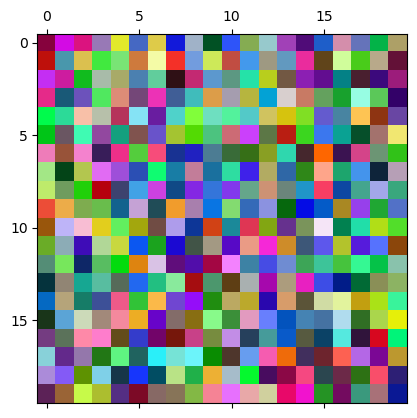

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#ustawiamy prarametry
wielkosc_macierzy = 20

#towrzymy macierz zawierającą koordynaty macierzy opsywanej
macierz_2 = np.zeros((wielkosc_macierzy * wielkosc_macierzy, 2))
#tworzymy macierz do przechowywania wektora
macierz_3 = np.zeros((wielkosc_macierzy * wielkosc_macierzy, 3))

#wypelniamy macierz koordynatow
for i in range(1, wielkosc_macierzy + 1):
    for j in range(1, wielkosc_macierzy + 1):
        macierz_2[(i - 1) * wielkosc_macierzy + (j - 1)] = (i, j)

#wypelniamy macierz wektoraa
for i in range(wielkosc_macierzy * wielkosc_macierzy):
    for j in range(3):
        macierz_3[i, j] = random.uniform(0, 1)

#łaczymy je
result = np.concatenate((macierz_2, macierz_3), axis=1)

#petla modyfikujaca nasza macierz
def axelrod(macierz, ilosc_petli, save_path=None):
    #funkcja updatujaca wizualizacje
    def update(frame):
        #losowo wybieramy agenta
        wspolrzedna_x = random.randint(1, wielkosc_macierzy)
        wspolrzedna_y = random.randint(1, wielkosc_macierzy)

        wspolrzedna_sąsiada_x = wspolrzedna_x
        wspolrzedna_sąsiada_y = wspolrzedna_y
        
        #losowo wybieramy liczby potrzebne do wybrania sasiada
        pomocnicza_wybieranie = random.randrange(-1, 2, 2)
        pomocnicza_dodawanie = random.randrange(-1, 2, 2)

        #wybieramy sasiada tak by jego wspolrzedne nie wyszly poza wielkosc macierzy
        if pomocnicza_wybieranie == -1:
            wspolrzedna_sąsiada_x_nowa = max(1, wspolrzedna_sąsiada_x + pomocnicza_dodawanie)
            wspolrzedna_sąsiada_x = min(wspolrzedna_sąsiada_x_nowa, wielkosc_macierzy)
        else:
            wspolrzedna_sąsiada_y_nowa = max(1, wspolrzedna_sąsiada_y + pomocnicza_dodawanie)
            wspolrzedna_sąsiada_y = min(wspolrzedna_sąsiada_y_nowa, wielkosc_macierzy)
        
        #wybieramy index wektora ktory chemy podmienic i wartosc miejsca o tym indeksie
        wybrany_index_wektora = random.randint(1, 3 - 1)
        wybrana_wartosc_punktu = macierz[
            (wspolrzedna_x - 1) * wielkosc_macierzy + wspolrzedna_y - 1, wybrany_index_wektora + 1]
        
        #resetujemy prawdopodobienstwo z poprzedniej iteracji petli
        prawdopodobienstwo = 0
        
        #liczymy nowe prawdopodobienstwo
        for i in range(3):
            if macierz[(wspolrzedna_x - 1) * wielkosc_macierzy + wspolrzedna_y - 1, i + 2] == \
                    macierz[(wspolrzedna_sąsiada_x - 1) * wielkosc_macierzy + wspolrzedna_sąsiada_y - 1, i + 2]:
                prawdopodobienstwo += 1
        
        #losujemy liczbe od 1 do 3 
        losowa_liczba = random.randint(1, 3)
        
        #jeli jest ona mniejsza od prawdopodonienstwo to dochodzi do dziedziczenia cechy
        if losowa_liczba >= prawdopodobienstwo:
            macierz[(wspolrzedna_sąsiada_x - 1) * wielkosc_macierzy + wspolrzedna_sąsiada_y - 1,
            wybrany_index_wektora + 1] = wybrana_wartosc_punktu
        
        #kazdej z 3 liczb w wektorze piszypisujemy kolor r, g lub b. dziala on tylko na pijedynczym piksleu 
        r, g, b = macierz[(wspolrzedna_sąsiada_x - 1) * wielkosc_macierzy + wspolrzedna_sąsiada_y - 1, 2:5]
        r, g, b = r * 255, g * 255, b * 255  # Skalowanie do zakresu 0-255
        macierz_wizualizacyjna[wspolrzedna_sąsiada_x - 1, wspolrzedna_sąsiada_y - 1] = (r, g, b)

        cax.set_array(macierz_wizualizacyjna)
        return cax,

    macierz_wizualizacyjna = np.zeros((wielkosc_macierzy, wielkosc_macierzy, 3), dtype=int)
    
    #przypisywanie kolorów ale na całe macierzy
    #wykonuje sie tylko raz na początku by stworzyc kolor dla kazdego pixela w pierwszej klatce animacji 
    for i in range(wielkosc_macierzy * wielkosc_macierzy):
        row_idx = int(macierz[i, 0]) - 1
        col_idx = int(macierz[i, 1]) - 1
        r, g, b = macierz[i, 2:5]
        r, g, b = r * 255, g * 255, b * 255  # Skalowanie do zakresu 0-255
        macierz_wizualizacyjna[row_idx, col_idx, :] = (r, g, b)

    fig, ax = plt.subplots()
    cax = ax.matshow(macierz_wizualizacyjna, cmap='viridis')  # Użyj mapy kolorów viridis

    ani = FuncAnimation(fig, update, frames=range(0, ilosc_petli, 10), repeat=False, blit=True) 
    #Aktualizuje tablicę wizualizacyjną 

    if save_path:
        ani.save(save_path, writer='ffmpeg', fps=10, dpi=200)

    plt.show()

# Wywołanie funkcji
ilosc_petli = 1000
video_save_path = r'C:\Users\kubaj\Desktop\Projekt\heatmap-nowa.mp4'  # Wprowadź pełną ścieżkę do dowolnego folderu
axelrod(result, ilosc_petli, save_path=video_save_path)